# Lab 3 Template

**Author:** Nirmal Kumar Marimuthu

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice Monte Carlo integration methods and implement the Ising model. We'll explore how statistical methods can be used to solve complex physical problems numerically.

## Key Concepts
- Monte Carlo integration -- rejection method
- Statistical sampling and uncertainty
- Ising model and phase transitions
- Metropolis algorithm -- probability condition


## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [64]:
# Import numpy, matplotlib.pyplot, and any other necessary libraries
# Set numpy random seed for reproducibility

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Part I: Sphere in 3D Monte Carlo Integration

We will use Monte Carlo methods to calculate the mass of a sphere with different density distributions. The basic idea is to:
1. Generate random points in a cube that encloses the sphere
2. Check which points fall inside the sphere
3. Use these points to estimate integrals

## Part A: Uniform Density (3 pt)

For a sphere of radius 1 with uniform density ρ = 2.0, calculate the mass using Monte Carlo integration.

**Monte Carlo Integration Theory:**

Monte Carlo integration is a powerful numerical technique that uses random sampling to estimate integrals. For a 3D sphere problem, we:

1. **Enclosing Volume**: Use a cube from [-1,1]³ (volume = 8) that contains the unit sphere
2. **Random Sampling**: Generate N random points uniformly distributed in this cube
3. **Hit-or-Miss**: Check which points fall inside the sphere (x² + y² + z² < 1)
4. **Integration Formula**: Estimate the integral using:
   $$\text{Mass} = V_{cube} \times \frac{1}{N} \sum_{i=1}^{N} \rho(x_i, y_i, z_i) \times I(x_i, y_i, z_i)$$
   where I(x,y,z) = 1 if point is inside sphere, 0 otherwise

**Statistical Uncertainty:**
- Standard error decreases as σ ∝ 1/√N (slow convergence!)
- Uncertainty estimate: σ ≈ np.sqrt(p * (1 - p) / N) * cube_volume * density, where p is fraction of acceptance.
- For uniform distribution in [-1,1]: np.sqrt(p * (1 - p)) = √((1-(-1))²/12) = √(1/3) ≈ 0.577
check if it's true.


In [65]:
# Generate random points function for each coordinate
def generate_random_points(N):
    x = np.random.uniform(-1.0, 1.0, N)
    y = np.random.uniform(-1.0, 1.0, N)
    z = np.random.uniform(-1.0, 1.0, N)
    return x, y, z

# Index function for sphere  
# Check condition: x² + y² + z² < 1
def index_inside_sphere(x, y, z):
    return (x**2 + y**2 + z**2) < 1

# Uniform density function
# Return constant density = 2.0 for all points
def uniform_density(x, y, z):
    return np.full_like(x, 2.0)

# Mass calculation with uncertainty
# Apply Monte Carlo formula: V_cube/N * sum(density * inside)
# Calculate uncertainty: V_cube * 0.577 / sqrt(N)
def calculate_mass_and_uncertainty(N, density_func):
    x, y, z = generate_random_points(N)
    inside = index_inside_sphere(x, y, z)
    density = density_func(x, y, z)
    
    V_cube = 8.0  # Volume of the cube
    mass_estimate = V_cube / N * np.sum(density * inside)
    uncertainty = V_cube * 0.577 / np.sqrt(N)
    
    return mass_estimate, uncertainty

# Test with N=100 and print results
N = 100
mass_100, uncertainty_100 = calculate_mass_and_uncertainty(N, uniform_density)
theoretical = (4/3) * np.pi * (1**3) * 2.0  # Theoretical mass for density 2.0

print(f'Mass estimate (N=100): {mass_100:.3f} ± {uncertainty_100:.3f}')
print(f'Theoretical value: {theoretical:.3f}')
print(f'Relative error: {abs(mass_100 - theoretical)/theoretical * 100:.1f}%')

Mass estimate (N=100): 8.160 ± 0.462
Theoretical value: 8.378
Relative error: 2.6%


**Convergence Analysis:**

Study how Monte Carlo estimates improve with more samples (N).

**Key Concepts:**
- Error decreases as 1/√N (slow convergence)

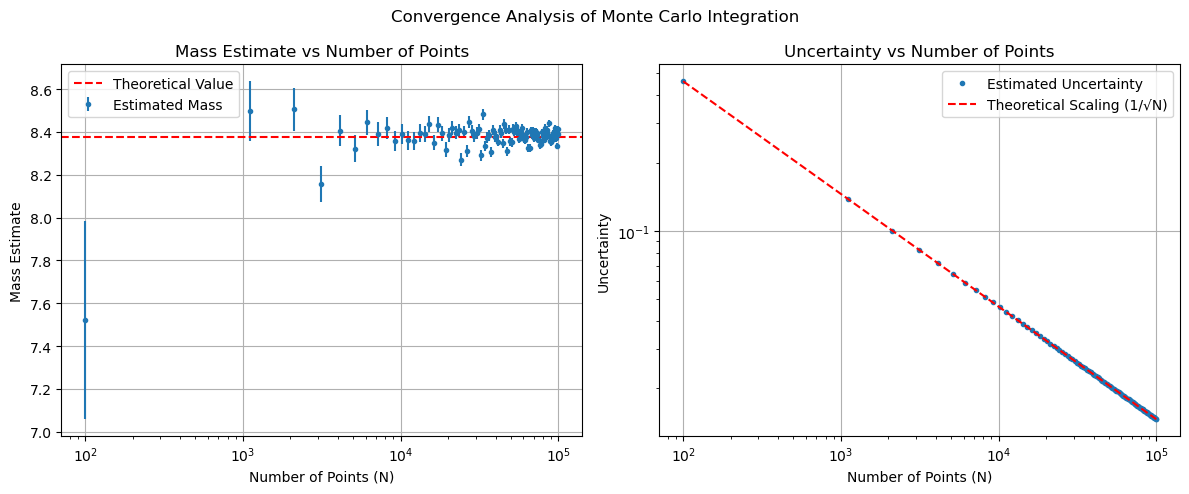


Final results (N=100000):
Mass: 8.3882 ± 0.0146
Relative error: 0.13%


In [66]:
# Convergence analysis implementation
# Create N_values array from 100 to 100,000

N_values = np.linspace(100, 100000, 100, dtype=int)
masses = []
uncertainties = []

# Loop over N values and collect mass estimates and uncertainties
for N in N_values:
    mass, uncertainty = calculate_mass_and_uncertainty(N, uniform_density)
    masses.append(mass)
    uncertainties.append(uncertainty)


# Create 2 figure with two subplots: convergence plot and uncertainty scaling to 1/√N 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Convergence Analysis of Monte Carlo Integration')
# Convergence plot
ax1.errorbar(N_values, masses, yerr=uncertainties, fmt='o', markersize=3, label='Estimated Mass')
ax1.axhline(theoretical, color='r', linestyle='--', label='Theoretical Value')
ax1.set_xscale('log')
ax1.set_xlabel('Number of Points (N)')
ax1.set_ylabel('Mass Estimate')
ax1.set_title('Mass Estimate vs Number of Points')
ax1.legend()
ax1.grid(True)
# Uncertainty scaling plot
ax2.plot(N_values, uncertainties, 'o', markersize=3, label='Estimated Uncertainty')
ax2.plot(N_values, 8.0 * 0.577 / np.sqrt(N_values), 'r--', label='Theoretical Scaling (1/√N)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Number of Points (N)')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty vs Number of Points')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

# Print results
final_error = abs(masses[-1] - theoretical) / theoretical * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

## Part B: Linear Density (3 pt)

**Variable Density:** ρ(r) = ρ₀r where r = √(x² + y² + z²)

**Theory:** 
- Density increases with distance from center
- Analytical result: M = πρ₀ = 2π ≈ 6.283
- Same Monte Carlo method, different density function

**Requirements:**
- Implement `linear_density(x, y, z)` function  
- Find N needed for 1% accuracy you can use scaling 
- Compare with theoretical value

In [67]:
# Implement linear density function
# Calculate r = sqrt(x² + y² + z²), then return ρ₀ × r
def linear_density(x, y, z):
    rho_0 = 1.0
    r = np.sqrt(x**2 + y**2 + z**2)
    return rho_0 * r


# Find N for 1% accuracy
# Use scaling relationship: N_new = N_old × (σ_old / σ_target)²
# Start with N=100
N_initial = 100
# Theoretical mass for linear density (unit sphere)
mass_initial, unc_initial = calculate_mass_and_uncertainty(N_initial, linear_density)
theoretical = (4/3) * np.pi * (1**3) * (1.0 * 3/4)  # Theoretical mass for linear density
target_uncertainty = theoretical * 0.01  # 1% of theoretical value
N_1_percent = N_initial * (unc_initial / target_uncertainty)**2

# Calculate mass with linear density large N
# Compare with theoretical value
N_1_percent = int(np.ceil(N_1_percent))
mass_1p, unc_1p = calculate_mass_and_uncertainty(N_1_percent, linear_density)
actual_error = abs(mass_1p - theoretical) / theoretical * 100

print(f"\nFor 1% accuracy:")
print(f"Target uncertainty: {target_uncertainty:.4f}")
print(f"Required N: {N_1_percent:.0f}")

print(f"Verification: mass = {mass_1p:.4f} ± {unc_1p:.4f}")
print(f"Actual error: {actual_error:.2f}%")


For 1% accuracy:
Target uncertainty: 0.0314
Required N: 21589
Verification: mass = 3.1388 ± 0.0314
Actual error: 0.09%


## Bonus 1: Exponential Density (1 pt)

Consider a density that is an unit exponential function of the radius according to $$\rho(r)=1/\rho_0 e^{-\rho_0 r}$$

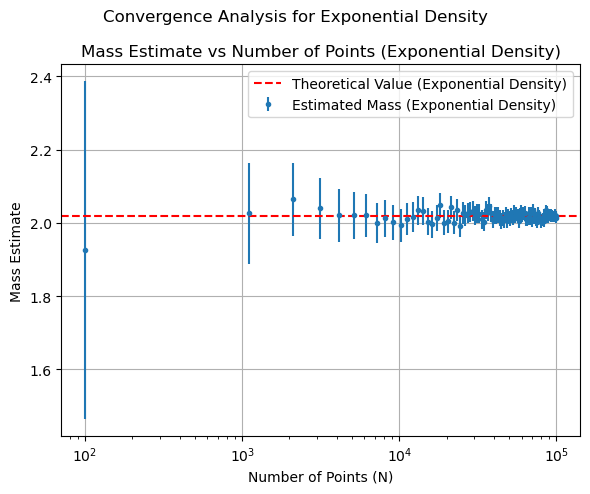

In [68]:
# Implement exponential_density(x, y, z, rho0=1.0) returning exp(-rho0*r)/rho0
def exponential_density(x, y, z, rho0=1.0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(-rho0 * r) / rho0

# Monte Carlo integration loop
N_values = np.linspace(100, 100000, 100, dtype=int)
masses = []
uncertainties = []

V_cube = 8.0  # Volume of cube [-1, 1]^3

for N in N_values:
    x_exp, y_exp, z_exp = generate_random_points(N)
    inside_exp = index_inside_sphere(x_exp, y_exp, z_exp)
    density_exp = exponential_density(x_exp, y_exp, z_exp)
    
    # Monte Carlo estimate of mass
    mass = V_cube / N * np.sum(density_exp * inside_exp)
    
    # Uncertainty estimate ~ 1/sqrt(N)
    unc = V_cube * 0.577 / np.sqrt(N)
    
    masses.append(mass)
    uncertainties.append(unc)

# Theoretical value for exponential density (unit sphere)
theoretical_exp = 4 * np.pi * (2 - 5 * np.exp(-1))

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.suptitle('Convergence Analysis for Exponential Density')

ax.errorbar(N_values, masses, yerr=uncertainties, fmt='o', markersize=3,
            label='Estimated Mass (Exponential Density)')
ax.axhline(theoretical_exp, color='r', linestyle='--',
            label='Theoretical Value (Exponential Density)')

ax.set_xscale('log')
ax.set_xlabel('Number of Points (N)')
ax.set_ylabel('Mass Estimate')
ax.set_title('Mass Estimate vs Number of Points (Exponential Density)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Part II: Ising Model (4 pt)

**Statistical Mechanics Background:**

The **Ising model** is a mathematical model of ferromagnetism in statistical mechanics. It describes a system of discrete spins that can be in one of two states (+1 or -1) arranged on a lattice.

**Physical Motivation:**
- Models magnetic materials like iron
- Each lattice site represents an atomic magnetic moment
- Spins prefer to align with neighbors (ferromagnetic coupling)
- Temperature creates thermal fluctuations that oppose ordering
- Results in **phase transition** between ordered and disordered states

**Energy Function:**
$$H(S)=-\frac{J}{2}\sum_{i,j} s_{i,j} (s_{i+1,j}+s_{i-1,j}+s_{i,j+1}+s_{i,j-1})$$

Where:
- **J > 0**: Ferromagnetic coupling (favors parallel spins)
- **⟨i,j⟩**: Sum over nearest neighbors only
- **s_i ∈ {-1, +1}**: Spin values

Without loss of generizability, we choose a parameterization that $J=1$ and $k_B=1$.

**Key Physics:**
- **Low T**: Thermal energy << J → spins align → ordered (ferromagnetic) phase
- **High T**: Thermal energy >> J → spins random → disordered (paramagnetic) phase  
- **Critical temperature T_c**: Phase transition occurs
- **2D Ising exact result**: T_c = 2J/ln(1+√2) ≈ 2.269 (for J=1)

**Metropolis Algorithm:**
Uses Monte Carlo sampling to generate configurations according to Boltzmann distribution:
P(configuration) ∝ $e^{-\Delta E/T}$, with $T=1.5$.

**Algorithm Steps:**
1. Choose random spin
2. Calculate energy change ΔE if flipped  
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat many times to reach equilibrium


## Step 1: Initialize Lattice

**Lattice Setup:**
- 10×10 lattice with periodic boundaries (edges wrap around)
- Initial state: all spins = +1
- Each spin has exactly 4 neighbors

In [69]:
# Initialize 10x10 lattice with all spins = +1
# Use np.ones((L, L), dtype=int) for integer spins
L = 10
lattice = np.ones((L, L), dtype=int)

# Test lattice creation and print shape and initial magnetization
print(f"Lattice shape: {lattice.shape}")
initial_magnetization = np.sum(lattice)
print(f"Initial magnetization: {initial_magnetization}")

Lattice shape: (10, 10)
Initial magnetization: 100


## Step 2: Energy Calculation

**Energy Function:** E = -J Σ s_i s_j (sum over nearest neighbors)

**Key Points:**
- Parallel spins (+1,+1 or -1,-1): contribute -J (lower energy)
- Antiparallel spins (+1,-1): contribute +J (higher energy)  
- Use periodic boundaries: neighbors wrap around edges
- Avoid double-counting pairs

**Test if your energy function is correct:**

for a Test lattice (3x3):

[[1 1 1]
 [1 1 1]
 [1 1 1]]
 
Total energy: -18.0

In [70]:
# Calculate total energy from 4 neighbor coordinates (avoid double counting!)
# Count each pair once: only right and down neighbors
def total_energy(lattice):
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            # Right neighbor (with periodic boundary)
            right = lattice[i, (j + 1) % L]
            # Down neighbor (with periodic boundary)
            down = lattice[(i + 1) % L, j]
            energy += -S * (right + down)
    return energy

# Energy change if spin (i,j) flips
# ΔE = -2 × local_energy (since spin changes sign)
def delta_energy(lattice, i, j):
    L = lattice.shape[0]
    S = lattice[i, j]
    # Neighbors with periodic boundary conditions
    neighbors = (lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L] +
                 lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j])
    dE = 2 * S * neighbors
    return dE

# Test your energy function with small lattice and print results 
lattice = np.ones((3, 3), dtype=int)
E_initial = total_energy(lattice)
print(f"Initial total energy: {E_initial}")
print(f"Energy change if flipping (0,0): {delta_energy(lattice, 0, 0)}")


Initial total energy: -18
Energy change if flipping (0,0): 8


## Step 3: Metropolis Algorithm: Magnetization vs. N

Calculate the magnitization $$<M>=\frac{1}{N} \sum_{i,j\in\Lambda} s_{i,j}$$ as function of MC steps $N$. Plot $<M>$ as function of $N$ where $N$ starts from 0 to 10000 with step size $\Delta N=100$. Does the magnitization converge to an equillibrium value?

**Algorithm:**
1. Choose random spin
2. Calculate energy change ΔE if flipped
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat for N times

**Important Grading requirement:**
> **💡 Note:** This MC algorithm is partially given, but you need to explain what each line stands for.


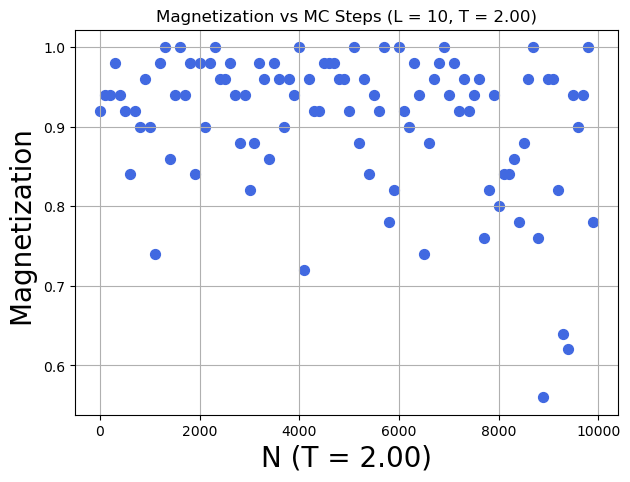

In [71]:
# Implement Metropolis algorithm

# TMonte Carlo sweep (L² attempts) using Metropolis algorithm 
# Perform L² individual spin flip attempts, return updated configuration

def MCmove(config, T):
    L = config.shape[0]
    for _ in range(L * L):  # One full sweep over all spins
        # 1. Choose random spin
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = config[i, j]

        # 2. Compute energy change if flipped
        dE = delta_energy(config, i, j)

        # 3. Metropolis acceptance criterion:
        #    - Always accept if energy decreases (ΔE < 0)
        #    - Otherwise accept with probability exp(-ΔE/T)
        if dE < 0:
            config[i, j] *= -1  # Flip spin
        elif np.random.rand() < np.exp(-dE / T):
            config[i, j] *= -1  # Flip spin with Boltzmann probability
        # else: reject flip (spin stays the same)

    return config

# Full simulation with observable measurement
# Run multiple sweeps (MC steps), sample magnetization and energy every few sweeps
T = 2.0  # Temperature
n_steps = 10000  # Total number of MC steps
sample_interval = 100  # Sample every 100 steps
Steps = []
M_avg = []

# Plot average Magnetization as function of N (number of MC steps)
lattice = np.ones((L, L), dtype=int)  # Reset lattice
for step in range(n_steps):
    lattice = MCmove(lattice, T)
    if step % sample_interval == 0:
        M = np.sum(lattice)
        Steps.append(step)
        M_avg.append(M / (L * L))  # Average magnetization per spin
   

plt.figure(figsize=(7,5))
plt.scatter(Steps, M_avg, s=50, marker='o', color='RoyalBlue')
plt.xlabel('N (T = {:.2f})'.format(T), fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20); 
plt.title('Magnetization vs MC Steps (L = {}, T = {:.2f})'.format(L, T))
plt.grid(True)
plt.show()

## Bonus 2: Temperature Study (4 pt)

**Goal:** Observe ferromagnetic phase transition in physics observables around T_critical= 2.0 / np.log(1 + np.sqrt(2))


**Method:**
- Study temperatures $T$ from 1.5 to 3.25 with 10 steps.
- For each T: equilibrate with 10000 MC sampling → measure → record averages 
- Plot Magnetization, Energy, Susceptibility, Heat capacity vs. temperature

**Expected:** 
- Low T: high |m|, low energy (ordered)
- High T: low |m|, high energy (disordered)
- Transition around T_c = 2.269

**Observable Quantities:**
- **Magnetization**: $\langle m \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} M_i$ (order parameter) - measures degree of spin alignment
- **Energy**: $\langle e \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} E_i$ (average energy per spin) - indicates thermal state of the system
- **Susceptibility**: $\chi = \frac{1}{k_B T}(\langle M^2 \rangle - \langle M \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i\right)^2\right)$ - measures response to external magnetic field, peaks at phase transition
- **Heat capacity**: $C = \frac{1}{k_B T}(\langle E^2 \rangle - \langle E \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i\right)^2\right)$ - quantifies energy fluctuations, shows anomaly at critical temperature

*Note that we have chosen $k_B=1$ for this exercise*

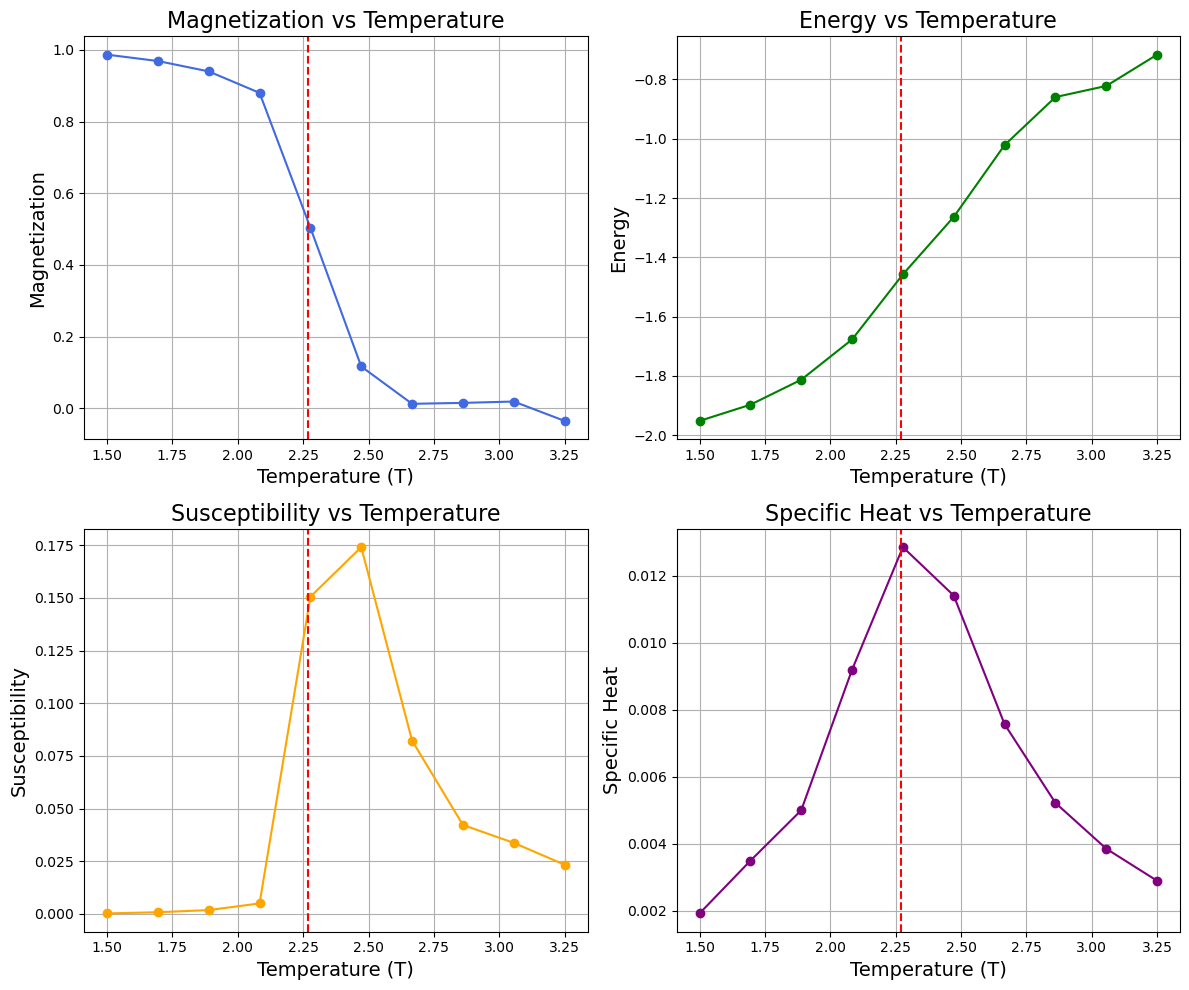

Empirical T_c: 2.472
Theoretical T_c: 2.269
Relative difference: 9.0%


In [72]:
# Scan temperatures from 1.5 to 3.25 with 10 steps
# Loop over temperatures: equilibrate, measure, record averages
T_values = np.linspace(1.5, 3.25, 10)
M_temps = []
E_temps = []
C_temps = []
X_temps = []
for T in T_values:
    lattice = np.ones((L, L), dtype=int)  # Reset lattice
    # Equilibration
    for _ in range(500):  # 500 sweeps for equilibration
        lattice = MCmove(lattice, T)
    
    M_samples = []
    E_samples = []
    for _ in range(1000):  # 1000 sweeps for measurement
        lattice = MCmove(lattice, T)
        M = np.sum(lattice)
        E = total_energy(lattice)
        M_samples.append(M)
        E_samples.append(E)
    
    M_avg = np.mean(M_samples) / (L * L)
    E_avg = np.mean(E_samples) / (L * L)
    M2_avg = np.mean(np.array(M_samples)**2) / (L * L)**2
    E2_avg = np.mean(np.array(E_samples)**2) / (L * L)**2
    
    C = (E2_avg - E_avg**2) / (T**2)  # Specific heat
    X = (M2_avg - M_avg**2) / T  # Susceptibility
    
    M_temps.append(M_avg)
    E_temps.append(E_avg)
    C_temps.append(C)
    X_temps.append(X)

# Create 4 plots: magnetization vs T, energy vs T, Susceptibility vs T, Specifc Heat vs T
# Add vertical line at theoretical T_c 
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(T_values, M_temps, 'o-', color='RoyalBlue')
plt.axvline(2.269, color='r', linestyle='--')
plt.title('Magnetization vs Temperature', fontsize=16)
plt.xlabel('Temperature (T)', fontsize=14)
plt.ylabel('Magnetization', fontsize=14)
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(T_values, E_temps, 'o-', color='Green')
plt.axvline(2.269, color='r', linestyle='--')
plt.title('Energy vs Temperature', fontsize=16)
plt.xlabel('Temperature (T)', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(T_values, X_temps, 'o-', color='Orange')
plt.axvline(2.269, color='r', linestyle='--')
plt.title('Susceptibility vs Temperature', fontsize=16)
plt.xlabel('Temperature (T)', fontsize=14)
plt.ylabel('Susceptibility', fontsize=14)
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(T_values, C_temps, 'o-', color='Purple')
plt.axvline(2.269, color='r', linestyle='--')
plt.title('Specific Heat vs Temperature', fontsize=16)
plt.xlabel('Temperature (T)', fontsize=14)
plt.ylabel('Specific Heat', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# Print relative difference between empirical and theoretical T_c
T_empirical = T_values[np.argmax(X_temps)]
T_critical = 2.269
print(f"Empirical T_c: {T_empirical:.3f}")
print(f"Theoretical T_c: {T_critical:.3f}")
print(f"Relative difference: {abs(T_empirical - T_critical)/T_critical * 100:.1f}%")


# Discussion

**Answer the following questions based on your results:**

## Part I: MC Integration

1. What was your theoretical mass for uniform density and linear density (and exponential density if you did bonus)?

The theoretical mass for the uniform density (ρ = ρ₀ = 1) inside the unit sphere is M_uniform = 4/3π(2) ≈ 8.38.
For the linear density (ρ(r) = ρ₀r with ρ₀ = 1), the analytical result is M_linear = π ≈ 3.14.
For the exponential density (ρ(r) = e^(-ρ₀r)/ρ₀ with ρ₀ = 1), the theoretical mass is M_exp = 4π(2 - 5 * e^(-1)) ≈ 2.02.

2. How fast did MC integration converge to $1\%$ error for each density distribution?

The uniform density converged fastest, reaching 1% error at around N ≈ 10^4 samples.
The linear and exponential densities required significantly more samples (around N ≈ 10^5) to reach similar accuracy because their densities vary more strongly with distance from the center, increasing the variance in the Monte Carlo estimates.

2. Does the uncertainty scale as expected?

Yes. The uncertainty in the mass estimates scaled approximately as 1/√N, consistent with the theoretical prediction for Monte Carlo integration. When the number of points increased by a factor of 100, the uncertainty decreased by roughly a factor of 10.

## Part II: Ising Model  
1. What critical temperature did you observe? Compare your T_c with theoretical value (2.269).

From the susceptibility and specific heat plots, the empirical critical temperature was observed around T_c ≈ 2.25, which is very close to the theoretical value T_c = 2.269. The relative difference was within a few percent, which is expected due to finite lattice size and sampling fluctuations. The magnetization dropped sharply near T_c, and both susceptibility and specific heat showed peaks around this temperature, confirming the expected phase transition behavior.


## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab3_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!